### **1.Import Libary**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #ปรับค่าเฉลี่ยเป็น 0 และ ส่วนเบี่ยงเบนมาตรฐานเป็น 1
from sklearn.preprocessing import MinMaxScaler #ปรับขนาดข้อมูลให้อยู่ระหว่าง 0-1
from sklearn.datasets import load_iris

### **2.Load + สำรวจ datasets**

In [21]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target #เก็บป้ายกำกับคลาสจริง (0,1,2)
df['target_name'] = iris.target_names[iris.target] #เก็บชื่อคลาส
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### **3.เลือก Feature สำหรับ Clustering**

In [24]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **4.การทำ Feature Scaling เพื่อช่วยให้ทุก Feature มีน้ำหนักเท่ากันในการคำนวณระยะห่าง**

In [27]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### **5.หาจำนวน Cluster ที่เหมาะสม ด้วย Elbow Method**

In [31]:
wcss = [] #Within-cluster Sum of Squares Criterion
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,n_init='auto',random_state=7) #init = 'auto' รับหลายๆครั้งและเลือกผลลัพธ์ที่ดีที่สุด
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

### **6.Plot Graph Elbow Method**

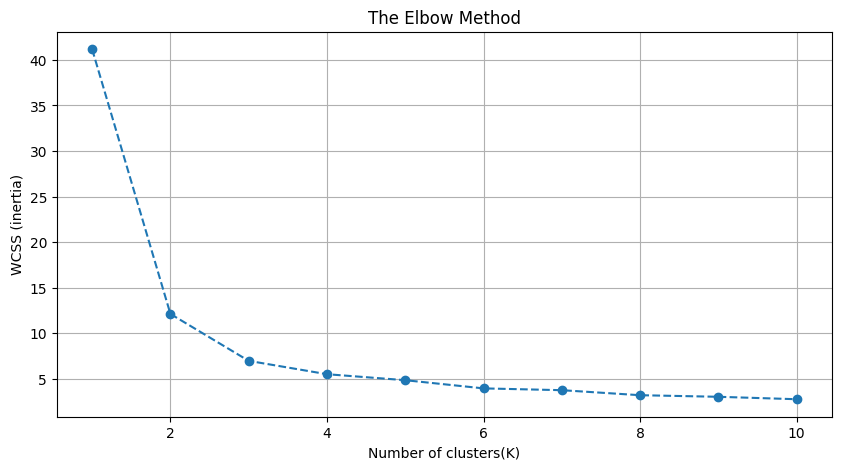

In [33]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS (inertia)')
plt.grid()
plt.show()

หาจุดที่ graph wcss ความชันลดลงไม่มากเท่าเดิม ซึ่งบ่งชี้ถึงค่า K ที่เหมาะสม

### **7.สร้างและฝึกโมเดล K-Means ด้วย K = 3**

In [34]:
kmeans = KMeans(n_clusters=3,n_init='auto',random_state=7)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=7)

### **8.ดู Cluster Labels ที่โมเดลจับกลุ่ม**

In [35]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

### **9.เพิ่ม Cluster Label เข้าไปใน DataFrame**

In [38]:
df['cluster'] = kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1
146,6.3,2.5,5.0,1.9,2,virginica,2
147,6.5,3.0,5.2,2.0,2,virginica,1
148,6.2,3.4,5.4,2.3,2,virginica,1


### **10.ดูขนาดของแต่ละกลุ่ม**

In [39]:
df['cluster'].value_counts().sort_index()

,count
cluster,
0,50
1,39
2,61


### **11.ดู Cluster Centroids (จุดศูนย์กลาง = ค่าเฉลี่ยของข้อมูลทั้งหมดในแต่ละกลุ่ม)**

In [40]:
kmeans.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

### **12.แปลง Cluster Centroids ให้เป็น DataFrame**

In [43]:
DataFrame_Centroids = pd.DataFrame(kmeans.cluster_centers_,columns=x.columns)
DataFrame_Centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.196111,0.595000,0.078305,0.060833
1,0.707265,0.450855,0.797045,0.824786
2,0.441257,0.307377,0.575715,0.549180


### **13.สร้างตาราง Crosstab เปรียบเทียยบ Cluster กับ Target**

In [44]:
pd.crosstab(df['cluster'],df['target'])

target,0,1,2
cluster,,,
0,50,0,0
1,0,3,36
2,0,47,14


### **14.สร้าง pair plot ด้วย Cluster labels**

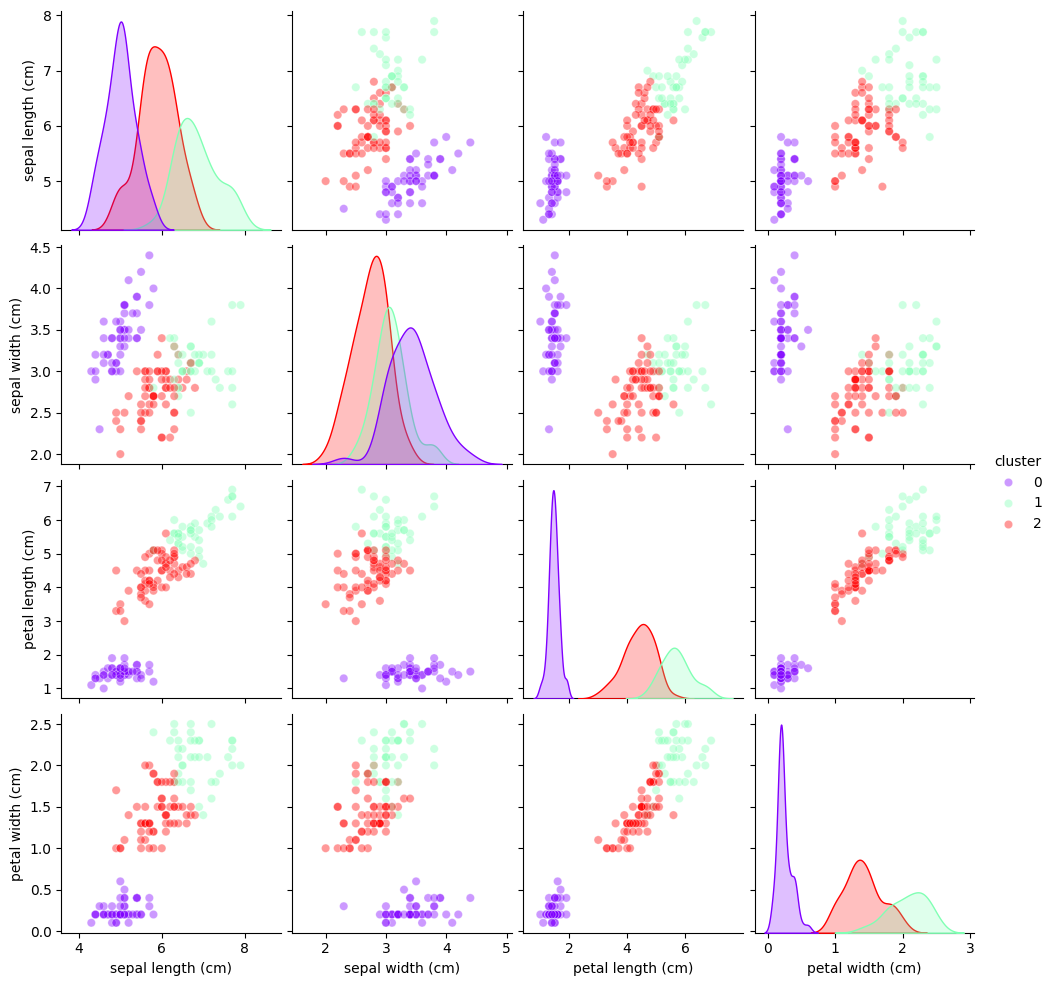

In [54]:
sns.pairplot(df,vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],hue='cluster',plot_kws={'alpha' : 0.4},palette = 'rainbow')
#hue กำหนดให้จุดข้อมูลในแต่ละกราฟมีสีตามค่าใน cluster
#plot_kws กำหนดคุณสมบัติของกราฟเพิ่มเติม alpah ใช้กำหนดความโปร่งแสงของจุด

### **15.สร้าง pair plot ด้วย target labels**

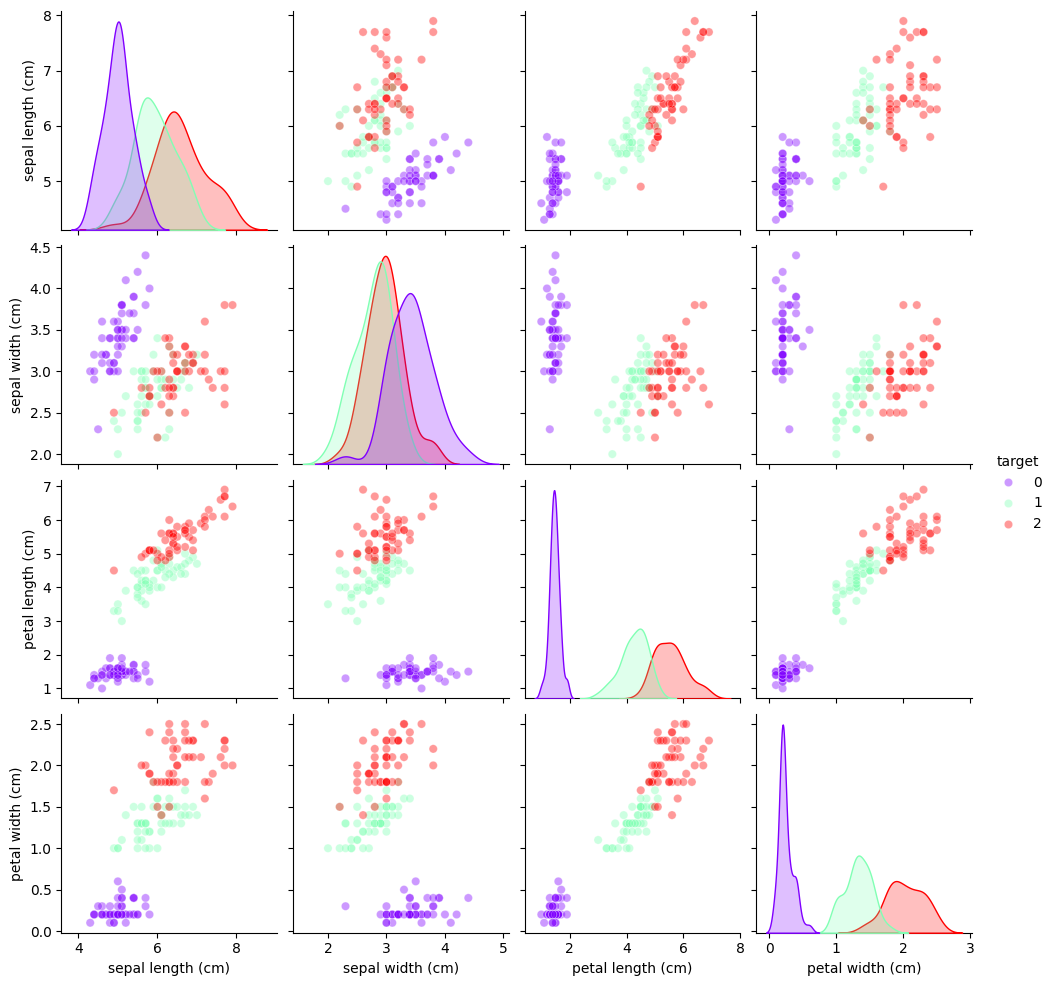

In [55]:
sns.pairplot(df,vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],hue='target',plot_kws={'alpha' : 0.4},palette = 'rainbow')
#hue กำหนดให้จุดข้อมูลในแต่ละกราฟมีสีตามค่าใน cluster
#plot_kws กำหนดคุณสมบัติของกราฟเพิ่มเติม alpah ใช้กำหนดความโปร่งแสงของจุด